In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam

ratings = pd.read_csv('ratings.csv')
ratings_df = pd.DataFrame(ratings)

# Convert user_id and movie_id to categorical codes
ratings_df['userId'] = ratings_df['userId'].astype('category')
ratings_df['movieId'] = ratings_df['movieId'].astype('category')

user_ids = ratings_df['userId'].cat.codes.values
movie_ids = ratings_df['movieId'].cat.codes.values

# Split the dataset
X = np.stack([user_ids, movie_ids], axis=1)
y = ratings_df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model parameters
n_users = ratings_df['userId'].nunique()
n_movies = ratings_df['movieId'].nunique()
n_factors = 20

# Building the model
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')
user_embedding = Embedding(output_dim=n_factors, input_dim=n_users, input_length=1, name='user_embedding')(user_input)
movie_embedding = Embedding(output_dim=n_factors, input_dim=n_movies, input_length=1, name='movie_embedding')(movie_input)
user_vector = Flatten(name='flatten_users')(user_embedding)
movie_vector = Flatten(name='flatten_movies')(movie_embedding)
y = Dot(axes=1, name='dot_product')([user_vector, movie_vector])
model = Model(inputs=[user_input, movie_input], outputs=y)
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

# Train the model
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=10, validation_data=([X_test[:, 0], X_test[:, 1]], y_test))

# Model summary
model.summary()


Epoch 1/10
2521/2521 [==============================] - 15s 5ms/step - loss: 10.0749 - val_loss: 4.2199
Epoch 2/10
2521/2521 [==============================] - 13s 5ms/step - loss: 2.6050 - val_loss: 2.0220
Epoch 3/10
2521/2521 [==============================] - 12s 5ms/step - loss: 1.4334 - val_loss: 1.5496
Epoch 4/10
2521/2521 [==============================] - 13s 5ms/step - loss: 1.0691 - val_loss: 1.3783
Epoch 5/10
2521/2521 [==============================] - 14s 5ms/step - loss: 0.9004 - val_loss: 1.3067
Epoch 6/10
2521/2521 [==============================] - 13s 5ms/step - loss: 0.8015 - val_loss: 1.2685
Epoch 7/10
2521/2521 [==============================] - 14s 5ms/step - loss: 0.7308 - val_loss: 1.2474
Epoch 8/10
2521/2521 [==============================] - 14s 5ms/step - loss: 0.6744 - val_loss: 1.2370
Epoch 9/10
2521/2521 [==============================] - 13s 5ms/step - loss: 0.6266 - val_loss: 1.2314
Epoch 10/10
2521/2521 [==============================] - 13s 5ms/step - 

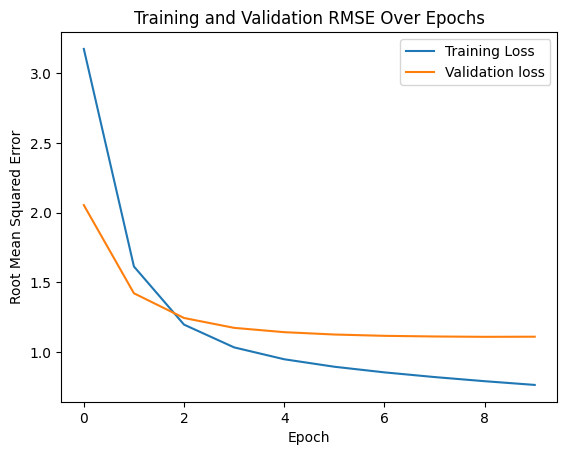

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation RMSE
plt.plot(np.sqrt(history.history['loss']), label='Training Loss')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Validation RMSE Over Epochs')
plt.legend()
plt.show()

In [ ]:
# After training the model, make a prediction

# Example: Predict the rating for a given user and movie
user_id_to_predict = 5
movie_id_to_predict = 10

# Since our model expects input in the form of category codes,
# we need to convert these IDs to their corresponding codes
user_id_code = np.argwhere(ratings_df['userId'].cat.categories == user_id_to_predict)[0, 0]
movie_id_code = np.argwhere(ratings_df['movieId'].cat.categories == movie_id_to_predict)[0, 0]

# Making the prediction
predicted_rating = model.predict([np.array([user_id_code]), np.array([movie_id_code])])

print(f"Predicted rating for user {user_id_to_predict} and movie {movie_id_to_predict}: {predicted_rating[0,0]}")


1/1 [==============================] - 0s 109ms/step
Predicted rating for user 5 and movie 10: 2.424847364425659


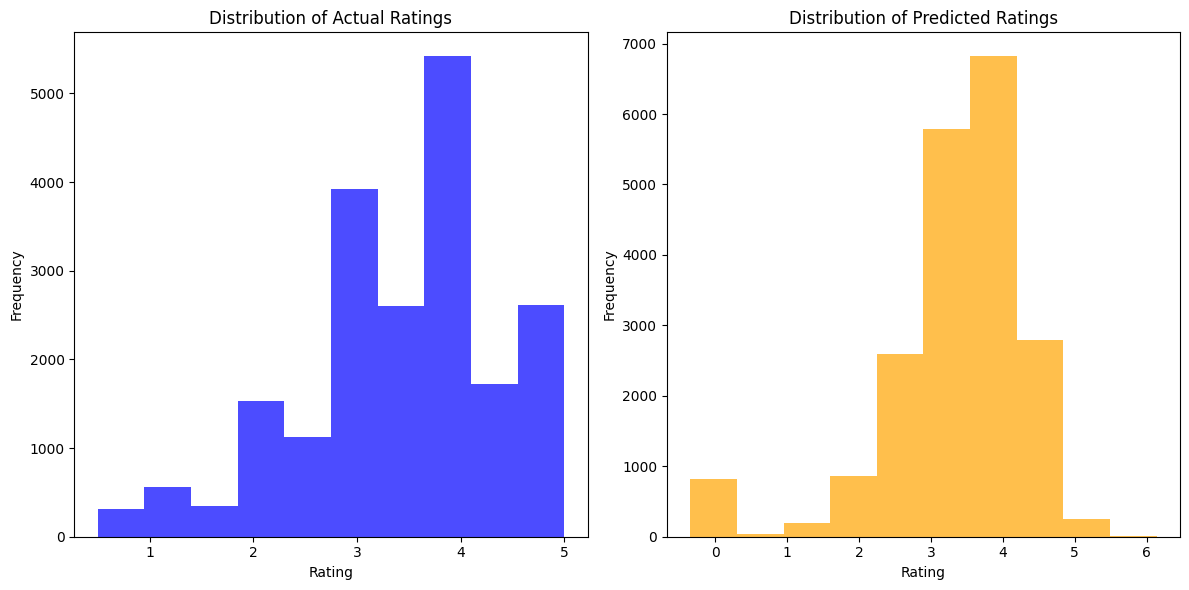

In [ ]:
# Create histograms for actual and predicted ratings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Actual Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_pred, bins=10, color='orange', alpha=0.7)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


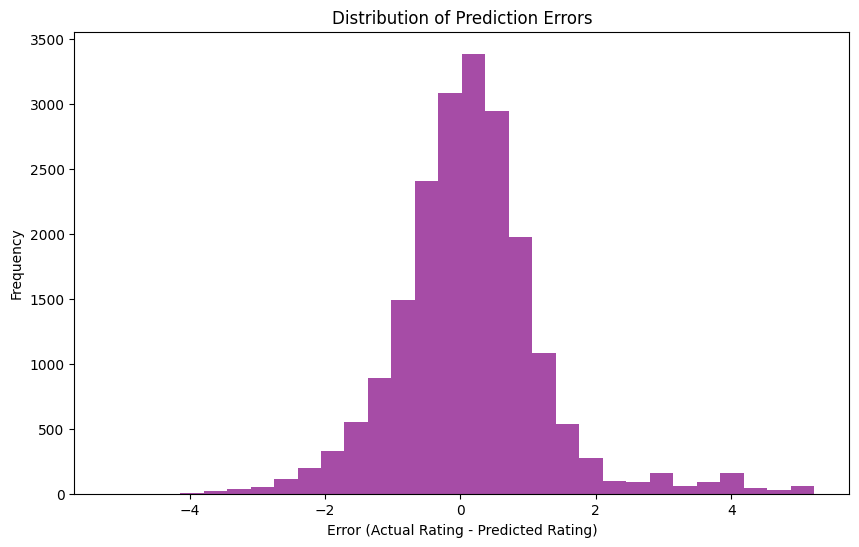

In [ ]:
# Calculate prediction errors
errors = y_test - y_pred.flatten()

# Create a histogram of prediction errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual Rating - Predicted Rating)')
plt.ylabel('Frequency')
plt.show()
